# Reactive Programming in Python

* https://github.com/ReactiveX/RxPY/blob/develop/notebooks/Getting%20Started.ipynb

# About

* An API for asynchronous programming with observable streams

* ReactiveX, or Rx for short, is an API for programming with observable event streams.

* The Observer pattern done right.

* ReactiveX is a combination of the best ideas from the 
  * Observer pattern, 
  * The Iterator pattern, and 
  * Functional programming

http://reactivex.io/

In [2]:
import rx

In [3]:
rx

<module 'rx' from '/usr/tmp/python3/lib/python3.4/site-packages/rx/__init__.py'>

In [4]:
from rx import Observable, Observer

In [5]:
help(Observer)

Help on class Observer in module rx.core.py3.observer:

class Observer(builtins.object)
 |  Methods defined here:
 |  
 |  as_observer(self)
 |      Hides the identity of an observer.
 |      
 |      Returns an observer that hides the identity of the specified observer.
 |  
 |  checked(self)
 |      Checks access to the observer for grammar violations. This includes
 |      checking for multiple OnError or OnCompleted calls, as well as
 |      reentrancy in any of the observer methods. If a violation is detected,
 |      an Error is thrown from the offending observer method call.
 |      
 |      Returns an observer that checks callbacks invocations against the
 |      observer grammar and, if the checks pass, forwards those to the
 |      specified observer.
 |  
 |  on_completed(self)
 |  
 |  on_error(self, error)
 |  
 |  on_next(self, value)
 |  
 |  to_notifier(self)
 |      Creates a notification callback from an observer.
 |      
 |      Returns the action that forwards its 

In [6]:
dir(Observer)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 'as_observer',
 'checked',
 'from_notifier',
 'on_completed',
 'on_error',
 'on_next',
 'to_notifier']

In [7]:
help(Observable)

Help on class Observable in module rx.core.py3.observable:

class Observable(builtins.object)
 |  Methods defined here:
 |  
 |  __add__(self, other)
 |      Pythonic version of concat
 |      
 |      Example:
 |      zs = xs + ys
 |      Returns self.concat(other)
 |  
 |  __await__(self)
 |      Awaits the given observable
 |      :returns: The last item of the observable sequence.
 |      :rtype: Any
 |      :raises TypeError: If key is not of type int or slice
 |  
 |  __getitem__(self, key)
 |      Slices the given observable using Python slice notation. The
 |       arguments to slice is start, stop and step given within brackets [] and
 |       separated with the ':' character. It is basically a wrapper around the
 |       operators skip(), skip_last(), take(), take_last() and filter().
 |      
 |       This marble diagram helps you remember how slices works with streams.
 |       Positive numbers is relative to the start of the events, while negative
 |       numbers are rela

# Concepts


Rx is about processing streams of events. With Rx you:

* Tell what you want to process (Observable)
* How you want to process it (A composition of operators)
* What you want to do with the result (Observer)

It's important to understand that ***with Rx you describe what you want to do with events if and when they arrive***. 

It's all a 

* Declarative composition of operators

* Will do some processing on the events when they arrive.

* If nothing happens, then nothing is processed.

Thus the pattern is that you subscribe to an Observable using an Observer:

subscription = Observable.subscribe(observer)

NOTE: Observables are not active in themselves. They need to be subscribed to make something happen. Simply having an Observable lying around doesn't make anything happen.


# Generating a Sequence

In [8]:
class MyObserver(Observer):
    def on_next(self, x):
        print("Got: %s" % x)
    
    def on_error(self, e):
        print("Got ERROR: %s" % x)
    
    def on_completed(self):
        print("Sequence completed")

In [9]:
subject = Observable.from_iterable(range(10))

In [27]:
subject

In [25]:
observer = MyObserver()

In [26]:
observer

In [11]:
subject.subscribe(observer)

Got: 0
Got: 1
Got: 2
Got: 3
Got: 4
Got: 5
Got: 6
Got: 7
Got: 8
Got: 9
Sequence completed


# Concepts

* The subscribe method takes an observer, or one to three callbacks for handing on_next(), on_error(), and on_completed().


* This is why we can use print directly as the observer in the example above, since it becomes the on_next() handler for an anonymous observer

## Interactive Rx - Generating

In [12]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

In [13]:
def interactiveObservable(count):
    print("-" * 30)
    
    sequence = range(count)
    subject = Observable.from_iterable(sequence)
    observer = MyObserver()
    subject.subscribe(observer)

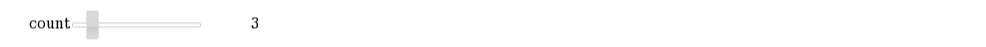

------------------------------
Got: 0
Got: 1
Got: 2
Sequence completed


<function __main__.interactiveObservable>

In [14]:
countSlider = widgets.IntSlider(min=2, max=10, step=1, value=3)

interact(interactiveObservable, count=countSlider)

In [15]:
from functools import partial

def interactiveSequenceObservable(observer, count):
    print("-" * 30)

    sequence = range(count)
    subject = Observable.from_iterable(sequence)
    subject.subscribe(observer)

# Reference

**Python Library: functools**

* https://docs.python.org/3/library/functools.html

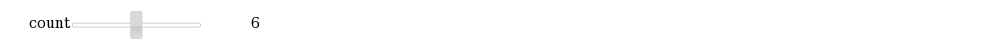

------------------------------
Got: 0
Got: 1
Got: 2
Got: 3
Got: 4
Got: 5
Sequence completed


In [16]:
countSlider = widgets.IntSlider(min=2, max=10, step=1, value=3)

callback = partial(interactiveSequenceObservable, MyObserver())
callback.__name__ = interactiveSequenceObservable.__name__

interact(callback, count=countSlider)

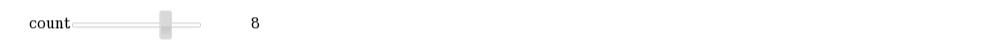

------------------------------
0
1
2
3
4
5
6
7


In [17]:
countSlider = widgets.IntSlider(min=2, max=10, step=1, value=3)

callback = partial(interactiveSequenceObservable, print)
callback.__name__ = interactiveSequenceObservable.__name__

interact(callback, count=countSlider)

# Filtering a Sequence

In [18]:
subject = Observable.from_iterable(range(10))
disposable = subject.filter(lambda x : x % 2).subscribe(print)
disposable

1
3
5
7
9


## Interactive Rx - Filtering

In [19]:
def interactiveFilter(observer, count, divisor):
    sequence = range(1, count+1)
    subject = Observable.from_iterable(sequence)
    filtered = subject.filter(lambda x: x % divisor)
    filtered.subscribe(observer)

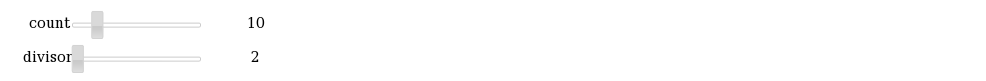

1
3
5
7
9


functools.partial(<function interactiveFilter at 0x7f8930435598>, <built-in function print>)

In [20]:
callback = partial(interactiveFilter, print)
callback.__name__ = interactiveFilter.__name__

countSlider = widgets.IntSlider(min=2, max=50, value=10)
divisorSlider = widgets.IntSlider(min=2, max=10, value=2)

interact(callback, count=countSlider, divisor=divisorSlider)

# Transforming a Sequence

In [21]:
subject = Observable.from_iterable(range(10))
disposable = subject.map(lambda x : x * 2).subscribe(print)
disposable

0
2
4
6
8
10
12
14
16
18


## Interactive Rx - Transformations

In [22]:
def interactiveTransformer(observer, count, code, debug=False):
    sequence = range(1, count+1)
    if debug:
        print(sequence, tuple(sequence))
    subject = Observable.from_iterable(sequence)
    callback = eval(code)
    filtered = subject.map(callback)
    filtered.subscribe(observer)

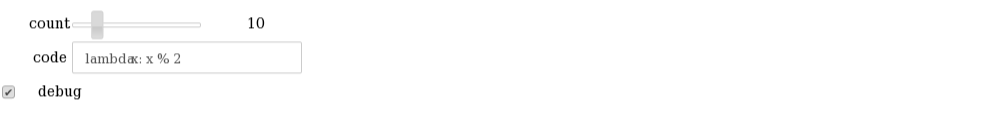

range(1, 11) (1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
1
0
1
0
1
0
1
0
1
0


In [23]:
callback = partial(interactiveTransformer, print)
callback.__name__ = interactiveTransformer.__name__

countSlider = widgets.IntSlider(min=2, max=50, value=10)
codeText = widgets.Text(value="lambda x: x % 2")
debugCheckBox = widgets.Checkbox(value=False)

interact(callback, count=countSlider, code=codeText, debug=debugCheckBox)

# Reference

* https://martinfowler.com/articles/collection-pipeline/

# Python Sandbox

In [24]:
result = eval('lambda x: x * 2')
result
tuple(map(result, (1, 2, 3, 4)))

(2, 4, 6, 8)